<a href="https://colab.research.google.com/github/mohansaidinesh/Capstone-Project-/blob/main/EDA_on_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Capstone Project**

*Predicting the Survival of Titanic Passengers*

**Exploratory data analysis**

In [16]:
#loading data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv")


Here we imported the pandas,seaborn and matplotlib libraries and next we read the csv file using the path name "train.csv" of the data set

In [17]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


head() gives the first 5 rows

In [18]:
#checking the null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The columns having null values are: Age, Cabin, Embarked. They need to be filled up with appropriate values later on.



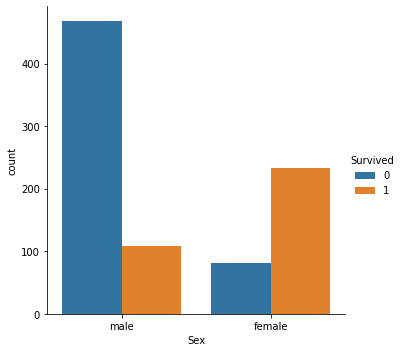

In [19]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = train)


Just by observing the graph, it can be approximated that the survival rate of men is around 20% and that of women is around 75%. Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.



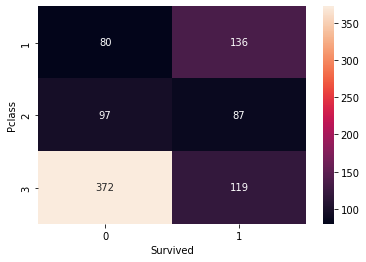

In [20]:
# Pclass vs Survived
# Group the dataset by Pclass and Survived and then unstack them
group = train.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")


It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.

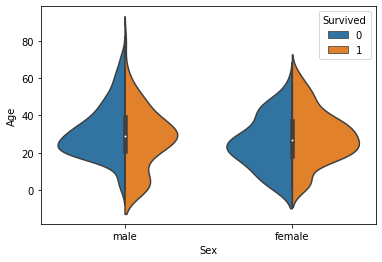

In [21]:
# Age vs Survived
# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = train, split = True)


This graph gives a summary of the age range of men, women and children who were saved. The survival rate is –

Good for children. High for women in the age range 20-50. Less for men as the age increases. Since Age column is important, the missing values need to be filled, either by using the Name column(ascertaining age based on salutation – Mr, Mrs etc.) or by using a regressor. After this step, another column – Age_Range (based on age column) can be created and the data can be analyzed again.



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


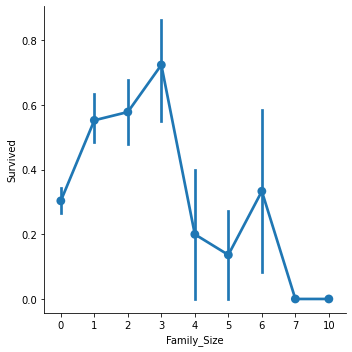

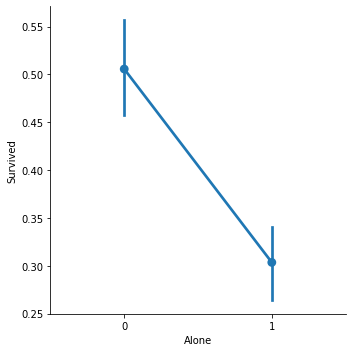

In [22]:
# Factor plot for family size
# Adding a column Family_Size
train['Family_Size'] = 0
train['Family_Size'] = train['Parch']+train['SibSp']
 
# Adding a column Alone
train['Alone'] = 0
train.loc[train.Family_Size == 0, 'Alone'] = 1
 
# Factorplot for Family_Size
sns.factorplot(x ='Family_Size', y ='Survived', data = train)
 
# Factorplot for Alone
sns.factorplot(x ='Alone', y ='Survived', data = train)

Family_Size denotes the number of people in a passenger’s family. It is calculated by summing the SibSp and Parch columns of a respective passenger. Also, another column Alone is added to check the chances of survival of a lone passenger against the one with a family.

Important observations –

If a passenger is alone, the survival rate is less. If the family size is greater than 5, chances of survival decrease considerably.

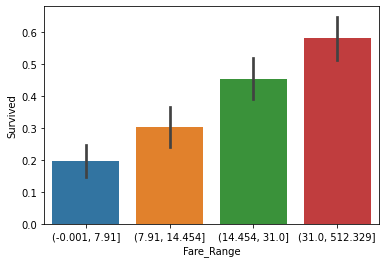

In [23]:
# Bar plot for fare
# Divide Fare into 4 bins
train['Fare_Range'] = pd.qcut(train['Fare'], 4)
 
# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived', data = train)


Fare denotes the fare paid by a passenger. As the values in this column are continuous, they need to be put in separate bins(as done for Age feature) to get a clear idea. It can be concluded that if a passenger paid a higher fare, the survival rate is more.

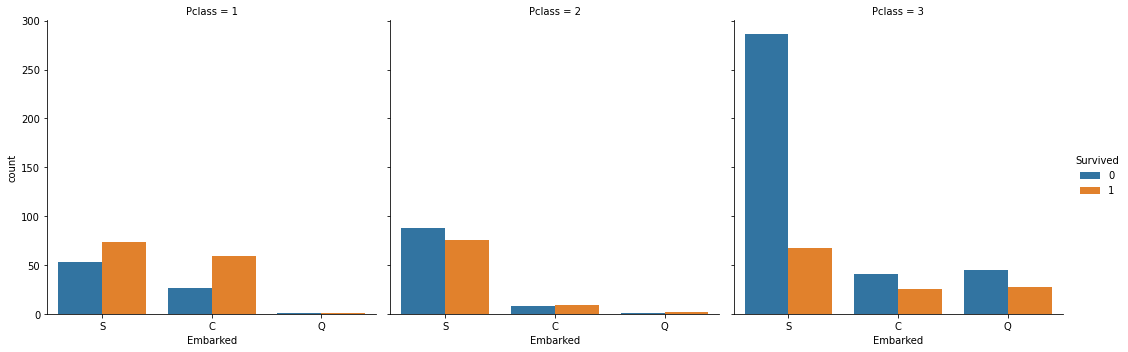

In [24]:
# Code: Categorical Count Plots for Embarked Feature  

# Countplot
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data = train)


Some notable observations are:

Majority of the passengers boarded from S. So, the missing values can be filled with S.
Majority of class 3 passengers boarded from Q.
S looks lucky for class 1 and 2 passengers compared to class 3.

Conclusion :
The columns that can be dropped are:

PassengerId, Name, Ticket, Cabin: They are strings, cannot be categorized and don’t contribute much to the outcome. Age, Fare: Instead, the respective range columns are retained.
The titanic data can be analyzed using many more graph techniques and also more column correlations, than, as described in this notebook.

**DATA CLEANING / PREPROCESSING**

In [25]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
#load the dataset
train = pd.read_csv("train.csv")

In [27]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
train.shape


(891, 12)

In [29]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

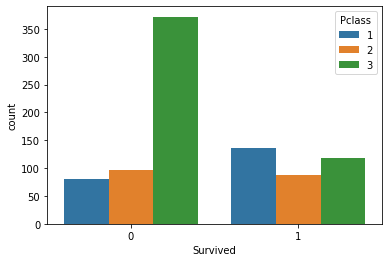

In [31]:
sns.countplot(x='Survived', hue='Pclass', data=train)


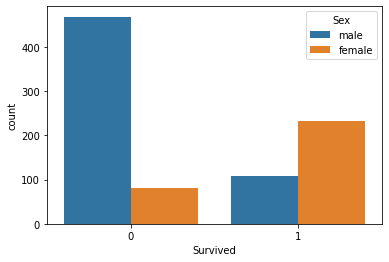

In [32]:
sns.countplot(x='Survived', hue='Sex', data=train)


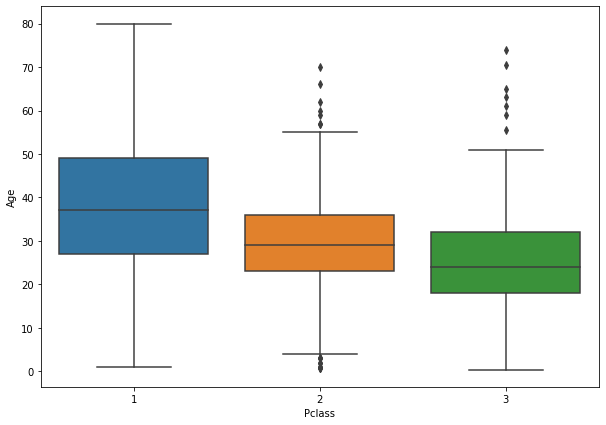

In [33]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [34]:
# impute average age values to null age values:
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(train[train["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age

In [35]:
train["Age"] = train[["Age", "Pclass"]].apply(add_age,axis=1)


In [36]:
#We have lots of null values for Cabin column, so we just remove it.

train.drop("Cabin",inplace=True,axis=1)


Cleaning is done,
Now, We are going to convert some categorical data into numeric. For example, the sex column.
Let’s use the get_dummies function of Pandas. It will create two columns, one for male, one for female

In [37]:
pd.get_dummies(train["Sex"])


,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [38]:
sex = pd.get_dummies(train["Sex"],drop_first=True)


In [39]:
sex.head()


,male
0,1
1,0
2,0
3,0
4,1


In [40]:
embarked = pd.get_dummies(train["Embarked"],drop_first=True)
pclass = pd.get_dummies(train["Pclass"],drop_first=True)


In [41]:
pclass.head()


,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [42]:
train = pd.concat([train,pclass,sex,embarked],axis=1)


In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1,0,1


In [44]:
#remove the columns which are not going to be useful for the model
train.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

In [45]:
train.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [46]:

# X will contain all the features and y will contain the target variable

y = train["Survived"]
X = train.drop("Survived",axis=1)


In [47]:
# use train_test_split from cross_validation module to split our data. 80% of the data will be training data and %20 will be testing data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

**Train the model**

***Using Logistic Regression***

In [63]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()  #define
logmodel.fit(X_train,y_train)    #fit


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Calculating absolute error**

In [65]:
from sklearn.metrics import mean_absolute_error
val_predictions=logmodel.predict(X_train)
print(mean_absolute_error(y_train,val_predictions))

0.17837078651685392



**Calculating Accuracy**

In [49]:
predictions = logmodel.predict(X_test) #predict
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       108
           1       0.75      0.69      0.72        71

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



**Confusion Matrix**

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)


array([[92, 16],
       [22, 49]])

True positive: 92 (We predicted a positive result and it was positive)

True negative: 49 (We predicted a negative result and it was negative)

False positive: 16 (We predicted a positive result and it was negative)

False negative: 22 (We predicted a negative result and it was positive)

**Using DecisionTreeClassifier**

In [52]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()  #define
model.fit(X_train,y_train)    #fit

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Calculating Absolute error**

In [66]:
from sklearn.metrics import mean_absolute_error
val_predictions=model.predict(X_train)
print(mean_absolute_error(y_train,val_predictions))

0.012640449438202247


**Calculating Accuracy**

In [53]:
predictions = model.predict(X_test) #predict
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       108
           1       0.71      0.69      0.70        71

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.77      0.76       179



**Confusion Matrix**

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)


array([[88, 20],
       [22, 49]])

True positive: 88 (We predicted a positive result and it was positive)

True negative: 49 (We predicted a negative result and it was negative)

False positive: 20 (We predicted a positive result and it was negative)

False negative: 22 (We predicted a negative result and it was positive)

**Using RandomForestClassifier**

In [55]:
from sklearn.ensemble import RandomForestClassifier
module = RandomForestClassifier()  #define
module.fit(X_train,y_train)    #fit

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Calculating Absolute error

In [67]:
from sklearn.metrics import mean_absolute_error
val_predictions=module.predict(X_train)
print(mean_absolute_error(y_train,val_predictions))

0.012640449438202247


**Calculating Accuracy**

In [56]:
predictions = module.predict(X_test) #predict
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       108
           1       0.79      0.73      0.76        71

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



**Confusion Matrix**

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)


array([[94, 14],
       [19, 52]])

True positive: 94 (We predicted a positive result and it was positive)

True negative: 52 (We predicted a negative result and it was negative)

False positive: 14 (We predicted a positive result and it was negative)

False negative: 19 (We predicted a negative result and it was positive)

**Conclusion**

The mean_absolute_error for the following algorithms is:
for logistic regressionis  0.1783
for decision treeclassifier is 0.0126
for random forest reggresor is 0.01264